# General Usage Satisfaction Student Activities Center
## Table of Contents

1. [Introduction](#introduction)
2. [Data Cleaning](#data_clean)
3. [Digger Deeper - Data Analysis](#analysis)
4. [Conclusion](#conclusion)
5. [Moving Forward](#movingforward)

<a id='introduction'></a>
## Introduction


This dataset contains survey responses from students, staffs, faculties and guests that enter the Student Activities Center (SAC). Its purpose is to gather data on the quality of the services and amenities the center has to offer and its general usage rate. Using this data, we will be analyzing guest satisfaction and what services and amenities the SAC should improve upon. 

The survey is first administered on **09/19/2018** and ended on **12/06/2018**.

*Note: This dataset is raw data exported from our survey distribution service, Qualtrics. The data collected is directly from our survey questions.* 

In [1]:
#Import Python packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import collections
import re
import matplotlib.patches as mpatches

#These two options allow Jupyter to display entire data in the cells.
pd.options.display.max_columns = None
pd.set_option('display.max_colwidth', -1)

We will read the dataset and call it **survey**. Let's have a quick look at the first and last five rows of our dataset.

In [2]:
survey = pd.read_csv("C:/Users/zhwweng/Desktop/survey/survey.csv")
survey.head(5)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q3,Q3_5_TEXT,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q5,Q6_1,Q6_2,Q6_3,Q6_5,Q7,Q8,Q9,Q10,Q11,Q12_1,Q12_2,Q12_3,Q12_1 - Topics
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,What brought you to the Student Activities Center today?\n\n(You may select more than one option),Which of the following describes you? - Selected Choice,Which of the following describes you? - Other: - Text,How would you rate each of the following for the building during your visit today? - Cleanliness/appearance of building,How would you rate each of the following for the building during your visit today? - Friendliness of staff,How would you rate each of the following for the building during your visit today? - Helpfulness of staff,How would you rate each of the following for the building during your visit today? - Accuracy/visibility of signs and directories,How would you rate each of the following for the building during your visit today? - Amount of public seating/study areas,How would you rate each of the following for the building during your visit today? - Visibility of school spirit,"On average, how often do you visit the Student Activities Center?",Please order these choices from most frequently used (#1) to least frequently used (#4) based on your experiences in the Student Activities Center for all the time you have spent in the building.\n(Use your fingers to re-arrange the options below.) - Campus dining services,Please order these choices from most frequently used (#1) to least frequently used (#4) based on your experiences in the Student Activities Center for all the time you have spent in the building.\n(Use your fingers to re-arrange the options below.) - Attending an event or meeting,Please order these choices from most frequently used (#1) to least frequently used (#4) based on your experiences in the Student Activities Center for all the time you have spent in the building.\n(Use your fingers to re-arrange the options below.) - Visiting offices or departments,"Please order these choices from most frequently used (#1) to least frequently used (#4) based on your experiences in the Student Activities Center for all the time you have spent in the building.\n(Use your fingers to re-arrange the options below.) - Using public spaces (studying, meeting, working)","Do the TV in the building (SCALA displays) show interesting, relevant information to you?",Were you or your group's accessibility needs met by the Student Activities Center?,"What services and/or amenities does the Student Activities Center currently provide that you find most helpful?\n(e.g. study tables with power outlets, on-campus Island Federal Credit Union location, all-gender restrooms, etc.) (Optional)",What services and/or amenities does the Student Activities Center currently lack that you would like to see added?\n\n(Optional),"Based on your feedback, may we contact you for additional details regarding your experience or your suggestions?",Thank you! Please enter your name and contact information below that would be best to reach you. - Your name,Thank you! Please enter your name and contact information below that would be best to reach you. - E-mail address,Thank you! Please enter your name and contact information below that would be best to reach you. - Phone number,Q12_1 - Topics
1,"{""ImportId"":""startDate"",""timeZone"":""America/Denver""}","{""ImportId"":""endDate"",""timeZone"":""America/Denver""}","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""Impo

In [3]:
survey.tail(5)

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q2,Q3,Q3_5_TEXT,Q4_1,Q4_2,Q4_3,Q4_4,Q4_5,Q4_6,Q5,Q6_1,Q6_2,Q6_3,Q6_5,Q7,Q8,Q9,Q10,Q11,Q12_1,Q12_2,Q12_3,Q12_1 - Topics
314,2018-11-28 11:27:36,2018-11-28 11:30:30,IP Address,130.245.192.1,100,174,True,2018-11-28 11:30:30,R_25vi0Iwwat6XHv4,NaN,NaN,NaN,NaN,40.90679931640625,-73.1277008056640625,anonymous,EN,Campus dining services,Undergraduate Student,NaN,Good,Good,Good,Good,Average,Average,Once per day,1,3,4,2,I haven't looked at/seen TV monitors in the SAC,Yes,NaN,Pool,No,NaN,NaN,NaN,NaN
315,2018-11-28 11:31:47,2018-11-28 11:35:28,IP Address,130.245.192.1,100,221,True,2018-11-28 11:35:29,R_32PBydMNUvgHXMV,NaN,NaN,NaN,NaN,40.90679931640625,-73.1277008056640625,anonymous,EN,Just passing through,Undergraduate Student,NaN,Good,Excellent,Excellent,Good,Average,Average,Once per week,2,4,3,1,Yes,Yes,NaN,NaN,No,NaN,NaN,NaN,NaN
316,2018-11-28 11:36:30,2018-11-28 11:38:09,IP Address,130.245.192.1,100,98,True,2018-11-28 11:39:22,R_2t3v1Wzrl7JgTkO,NaN,NaN,NaN,NaN,40.90679931640625,-73.1277008056640625,anonymous,EN,Visiting an office/department,Undergraduate Student,NaN,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Two or three times per week,2,4,1,3,Yes,Yes,NaN,NaN,No,NaN,NaN,NaN,NaN
317,2018-11-30 17:21:10,2018-11-30 17:27:25,IP Address,130.245.192.1,100,374,True,2018-11-30 17:27:25,R_qQLie5llTm4nW1P,NaN,NaN,NaN,NaN,40.90679931640625,-73.1277008056640625,anonymous,EN,Attending an event/meeting/class,Guest to Campus,NaN,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Less than once a week,4,1,2,3,I haven't looked at/seen TV monitors in the SAC,Yes,NaN,NaN,No,NaN,NaN,NaN,NaN
318,2018-11-30 17:28:49,2018-11-30 17:32:52,IP Address,130.245.192.1,100,242,True,2018-11-30 17:32:52,R_RmB6t2CaU7qk5ln,NaN,NaN,NaN,NaN,40.90679931640625,-73.1277008056640625,anonymous,EN,Attending an event/meeting/class,Undergraduate Student,NaN,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Two or three times per week,4,1,2,3,I haven't looked at/seen TV monitors in the SAC,I have no accessibility concerns,NaN,NaN,No,NaN,NaN,NaN,NaN


<a id='data_clean'></a>
## Data Cleaning 

After looking at our dataset, there seems to be many rows and columns that we do not need. Let's remove those rows and rename our columns appropriately. 

In [4]:
#Selected column indexes that will be removed
droppedCols = [1,2,3,4,6,7,8,9,10,11,12,13,14,15,16,39]
survey.drop(survey.columns[droppedCols],axis=1,inplace=True)

#Drop the first two rows and rename our columns
survey.drop(survey.index[:2],inplace=True)
new_column_names = ['DATE','DURATION(SECONDS)','Q1 WHAT BROUGHT YOU HERE?','Q2_1 WHICH OF THE FOLLOWING DESCRIBES YOU?','Q2_2 TEXT: OTHERS',
                    'Q3_1 RATE CLEANLINESS OF BUILDING','Q3_2 RATE FRIENDLINESS OF STAFF','Q3_3 RATE HELPFULNESS OF STAFF',
                    'Q3_4 RATE ACCURACY/VISIBILITY OF SIGNS','Q3_5 RATE AMOUNT OF SEATING AREA','Q3_6 RATE SCHOOL SPIRIT',
                    'Q4 HOW OFTEN DO YOU VISIT SAC?','Q5_1 ORDER MOST(1) FREQUENT TO LEAST(4) - CAMPUS DINING',
                    'Q5_2 ORDER MOST(1) FREQUENT TO LEAST(4) - ATTEND MEETING/EVENT','Q5_3 ORDER MOST(1) FREQUENT TO LEAST(4) - VISIT OFFICE/DEPARTMENT'
                    ,'Q5_4 ORDER MOST(1) FREQUENT TO LEAST(4) - USING PUBLIC SPACE','Q6 DO TV SHOW RELEVANT INFO?'
                    ,'Q7 WERE ACCESSIBILITY NEEDS MET BY SAC?','Q8 WHAT SERVICES/AMENITIES DO WE HAVE?'
                    ,'Q9 WHAT SERVICES/AMENITIES DO WE LACK?','Q10 MAY WE CONTACT YOU AGAIN?'
                    ,'Q11_1 NAME','Q11_2 EMAIL ADDRESS','Q11_3 NUMBER']
survey.columns = new_column_names

Question 1 asks, **"What brought you here to the SAC?"**. Our guests are given the option to pick multiple choices. These answer choices are put together in one column. Let's split the answer choices and count them individually. 

In [5]:
#Split the question column into multiple choices
survey_q1 = survey['Q1 WHAT BROUGHT YOU HERE?'].replace(to_replace = " \(studying, meeting, working\)",value = "", regex= True)
survey_q1 = survey_q1.str.rsplit("," ,expand=True)

#Sum up the choices into one column
full_column = pd.concat([survey_q1[0],survey_q1[1],survey_q1[2]])

Upon looking at the first three rows, we also see that there seems to be a problem with the data input. There are only 4 choices allowed for Question 6, but some replies had a **'5'** instead of a **'4'** in data. Let's fix the problem by replacing the numbers.

In [6]:
#Use boolean indexing to find out which questions has the error and change them to '4'
survey[survey == '5'] = '4'

It seems that the dataset is in **string** type for all its columns. Let's change a few columns to its appropriate data type.


In [7]:
#Change 'str' type to 'datetime'
survey['DATE'] = pd.to_datetime(survey['DATE'])

#Change 'str' type to 'int64'
question_6 = ["Q5_1 ORDER MOST(1) FREQUENT TO LEAST(4) - CAMPUS DINING",
              "Q5_2 ORDER MOST(1) FREQUENT TO LEAST(4) - ATTEND MEETING/EVENT"
              ,"Q5_3 ORDER MOST(1) FREQUENT TO LEAST(4) - VISIT OFFICE/DEPARTMENT",
              "Q5_4 ORDER MOST(1) FREQUENT TO LEAST(4) - USING PUBLIC SPACE"]
for question in question_6:
    survey[question] = pd.to_numeric(survey[question])

#Change 'str' type to 'int64'
survey['DURATION(SECONDS)'] = pd.to_numeric(survey['DURATION(SECONDS)'])

Qualtrics' data on the time the survey was administered is off by two hours. Let's fix the mistake by changing the time and adding an **Hour** column into the data set. 

In [8]:
#Add +2 hours since Qualtrics has a mistake
two_hours = datetime.timedelta(hours=2)
survey['DATE'] = survey['DATE'] + two_hours
#Convert datetime to str then to int and put in list
hours_list = []
for hour in survey['DATE']:
    hours_list.append("%s" % (hour.hour))
hours_list = list(map(int, hours_list))

#Convert military time to standard time
new_hours_list =[]
for number in hours_list:
    if number > 12:
        number = number - 12
    new_hours_list.append(number)

#Convert list to series
hour = pd.Series(hours for hours in new_hours_list)

survey = survey.reset_index(drop=True)
survey.insert(1, "HOUR", hour)

Here is a preview of our cleaned dataset, **survey**.

In [9]:
survey.head(5)

,DATE,HOUR,DURATION(SECONDS),Q1 WHAT BROUGHT YOU HERE?,Q2_1 WHICH OF THE FOLLOWING DESCRIBES YOU?,Q2_2 TEXT: OTHERS,Q3_1 RATE CLEANLINESS OF BUILDING,Q3_2 RATE FRIENDLINESS OF STAFF,Q3_3 RATE HELPFULNESS OF STAFF,Q3_4 RATE ACCURACY/VISIBILITY OF SIGNS,Q3_5 RATE AMOUNT OF SEATING AREA,Q3_6 RATE SCHOOL SPIRIT,Q4 HOW OFTEN DO YOU VISIT SAC?,Q5_1 ORDER MOST(1) FREQUENT TO LEAST(4) - CAMPUS DINING,Q5_2 ORDER MOST(1) FREQUENT TO LEAST(4) - ATTEND MEETING/EVENT,Q5_3 ORDER MOST(1) FREQUENT TO LEAST(4) - VISIT OFFICE/DEPARTMENT,Q5_4 ORDER MOST(1) FREQUENT TO LEAST(4) - USING PUBLIC SPACE,Q6 DO TV SHOW RELEVANT INFO?,Q7 WERE ACCESSIBILITY NEEDS MET BY SAC?,Q8 WHAT SERVICES/AMENITIES DO WE HAVE?,Q9 WHAT SERVICES/AMENITIES DO WE LACK?,Q10 MAY WE CONTACT YOU AGAIN?,Q11_1 NAME,Q11_2 EMAIL ADDRESS,Q11_3 NUMBER
0,2018-09-19 10:29:00,10,5023,"Using public spaces (studying, meeting, working)",Undergraduate Student,NaN,Good,Good,Average,Average,Below Average,Good,Two or three times per week,1,3,4,2,I haven't looked at/seen TV monitors in the SAC,I have no accessibility concerns,Microwave,More seats\n,No,NaN,NaN,NaN
1,2018-09-19 11:52:57,11,168,Campus dining services,Undergraduate Student,NaN,Excellent,Excellent,Excellent,Excellent,Excellent,Excellent,Two or three times per day,2,1,3,4,I haven't looked at/seen TV monitors in the SAC,Yes,Study tables,Nothing,No,NaN,NaN,NaN
2,2018-09-19 11:56:14,11,238,Campus dining services,Undergraduate Student,NaN,Excellent,Excellent,Good,Average,Good,Good,Two or three times per week,1,4,4,3,I haven't looked at/seen TV monitors in the SAC,Yes,NaN,NaN,Yes,Paul Massa,Paul.massa@stonybrook.edu,6314282836
3,2018-09-19 13:03:48,1,240,Just passing through,Undergraduate Student,NaN,Below Average,Good,Average,Below Average,Poor,Good,Two or three times per day,1,2,4,3,No,No,All gender restrooms,More studying areas and microwaves,No,NaN,NaN,NaN
4,2018-09-19 13:07:54,1,180,"Using public spaces (studying, meeting, working),Just passing through",Undergraduate Student,NaN,Excellent,Excellent,Excellent,Excellent,Average,Good,Two or three times per week,4,2,1,3,Yes,Yes,"Study spaces, food",NaN,No,NaN,NaN,NaN


<a id='analysis'></a>
# Digging Deeper

Now that we our data set cleaned, we can start performing our analysis.

### 1) Which of the following describes you?

Total number of responses: 317
Undergraduate Student    267
Graduate Student         36 
Faculty/Staff            9  
Guest to Campus          5  
Name: Q2_1 WHICH OF THE FOLLOWING DESCRIBES YOU?, dtype: int64


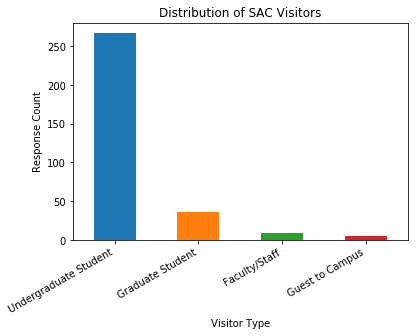

In [10]:
#Who took our surveys?
fig, ax1 = plt.subplots()
survey['Q2_1 WHICH OF THE FOLLOWING DESCRIBES YOU?'].value_counts().plot(ax=ax1,kind='bar',
                                                                         title = "Distribution of SAC Visitors")
plt.ylabel("Response Count")
plt.xlabel("Visitor Type")
plt.setp(ax1.get_xticklabels(), rotation=30, horizontalalignment='right')
print("Total number of responses:", survey['Q2_1 WHICH OF THE FOLLOWING DESCRIBES YOU?'].count())
print(survey['Q2_1 WHICH OF THE FOLLOWING DESCRIBES YOU?'].value_counts())

Most of our visitors are undergraduate students. The SAC is located at the center of campus, situated next to many buildings for undergraduate classes. There doesn't seem to be as many graduate students, faculties or guests that visits the SAC.

*Note: While administering the survey, I did not ask many staff, faculty or guests since they were preoccupied with other tasks on hand.*

### 2) What brought you to the Student Activities Center today?

Total number of responses: 368
Campus dining services              139
Just passing through                79 
Using public spaces                 73 
Attending an event/meeting/class    41 
Visiting an office/department       36 
dtype: int64


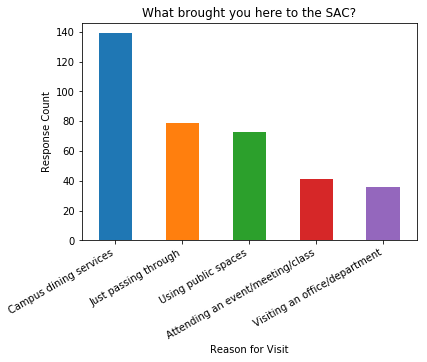

In [11]:
fig, ax2 = plt.subplots()
q2_bar = full_column.value_counts().plot(ax=ax2,kind='bar',title = "What brought you here to the SAC?")
plt.ylabel("Response Count")
plt.xlabel("Reason for Visit")
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')
print("Total number of responses:", full_column.count())
print(full_column.value_counts())

We ask our visitors what their reason(s) for visit today. Most of our visitors come to the SAC for **campus dining services**. The SAC is located at a central location on campus and thus, at a very convenient spot for students to come and grab food.

The second most popular reason is **just passing through**. It is interesting to note that even though a visitor is visiting the SAC, they are just passing through without using the building's services or amenities. Some reasons include meeting up with friends or taking a shortcut to another building.

*Note: There are more answer responses than respondents because the question allows for multiple selection choices*

Let's break down the data into different body groups.

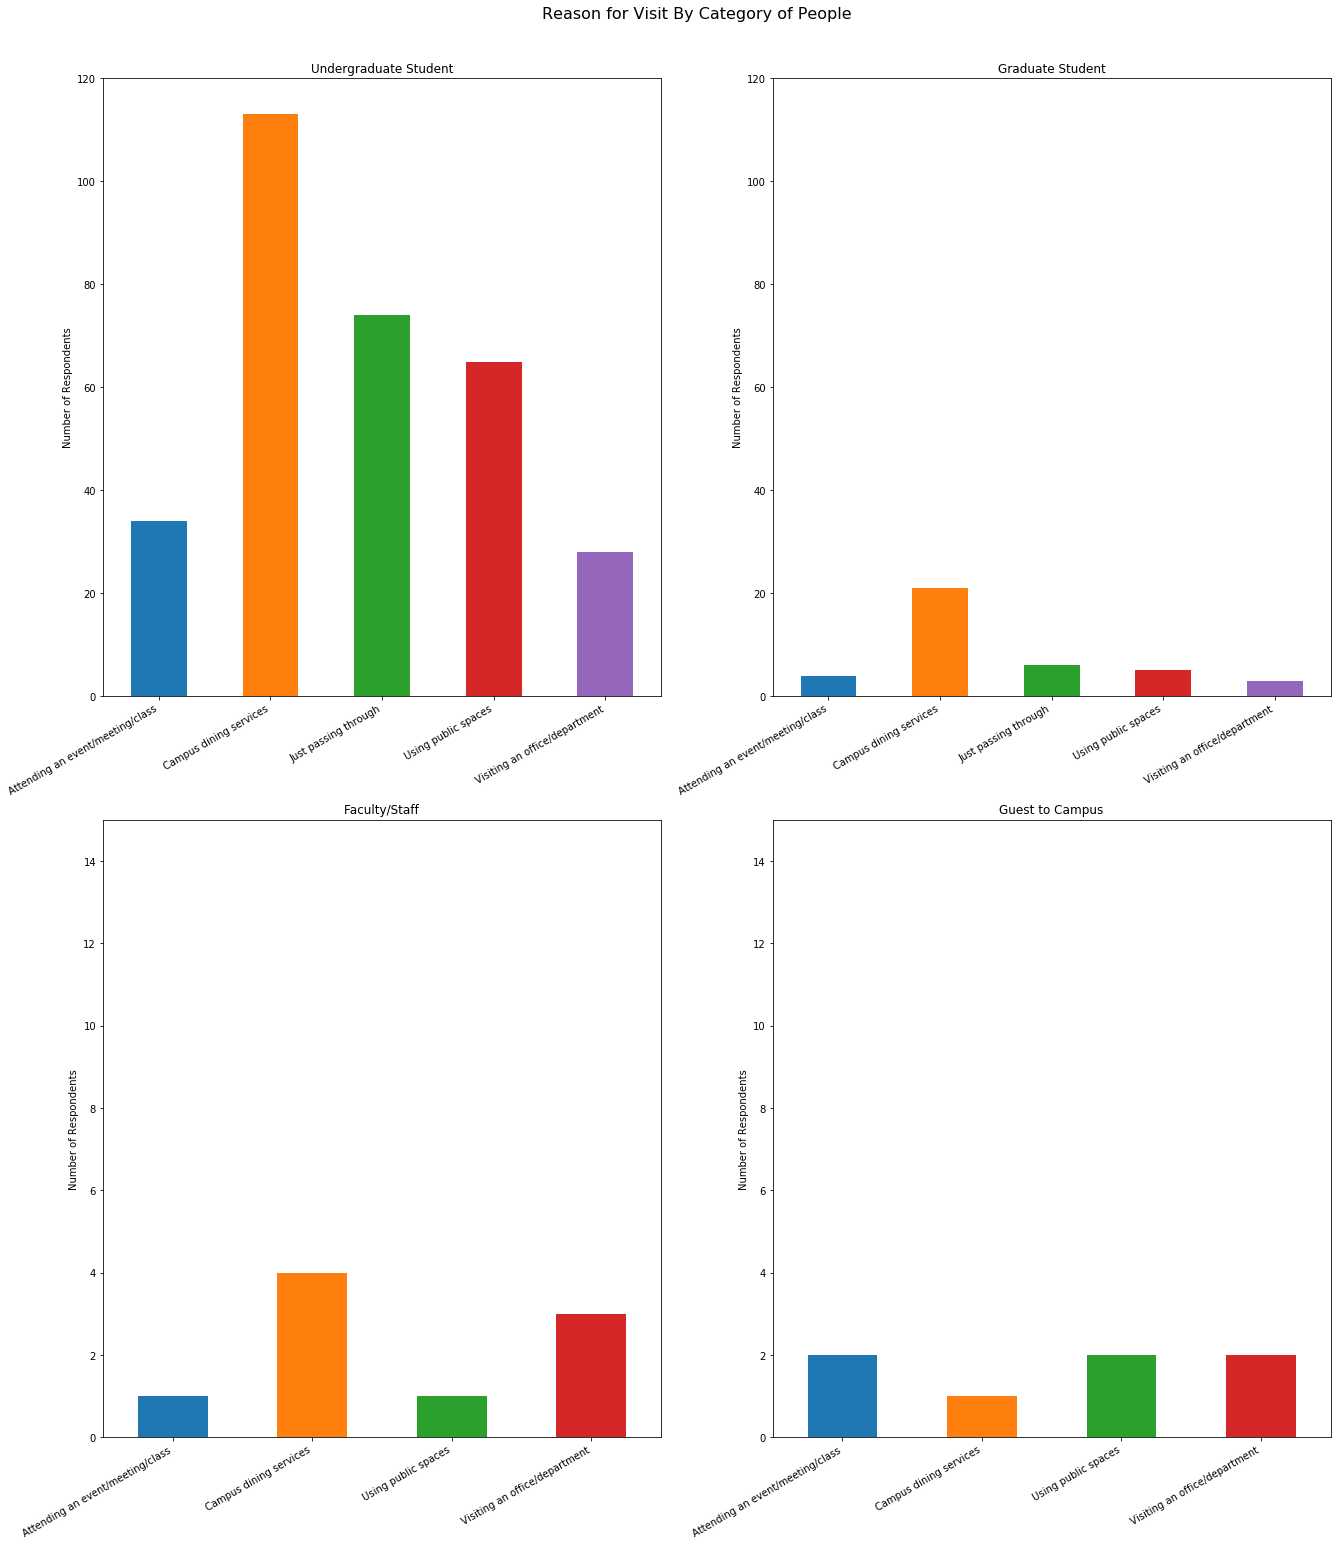

In [12]:
###BY CATEGORY OF PEOPLE
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(22,25))
category = ["Undergraduate Student", "Graduate Student", "Faculty/Staff", "Guest to Campus"]
fig.suptitle("Reason for Visit By Category of People",y=.92, fontsize=16)
my_colors = "#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd"

def create_graph(category_name,axes_label):
    graph = survey[survey['Q2_1 WHICH OF THE FOLLOWING DESCRIBES YOU?'] == category_name]
    survey_graph = graph['Q1 WHAT BROUGHT YOU HERE?'].replace(to_replace = 
                                                              " \(studying, meeting, working\)",value = "", regex= True)
    survey_graph = survey_graph.str.rsplit("," ,expand=True)
    
    empty_list = []
    for i in range(len(survey_graph.columns)):
        survey_graph[i] = survey_graph[i].tolist()
        empty_list.append(survey_graph[i])
    flat_list = [item for sublist in empty_list for item in sublist]
    list_series = pd.Series(flat_list)
    
    graph = list_series.value_counts().sort_index().plot(ax=axes_label,kind='bar',title = category_name)
    plt.setp(axes_label.get_xticklabels(), rotation=30, horizontalalignment='right')
    if axes_label == ax3 or axes_label == ax4:
        axes_label.set_ylim(0,15)
    else:
        axes_label.set_ylim(0,120)
    axes_label.set_ylabel("Number of Respondents")
    
create_graph("Undergraduate Student", ax1)
create_graph("Graduate Student", ax2)
create_graph("Faculty/Staff", ax3)
create_graph("Guest to Campus", ax4)
    


The trend still follows that the majority of our visitors come for campus dining services. Most faculty and staff are visiting an office or department.

*Note:The scaling for "Faculty/Staff" and "Guest to Campus" is different than the other two for visual purposes. We do not have a big enough sample size to find significant information.*

Let's break the down data by different times of the day.

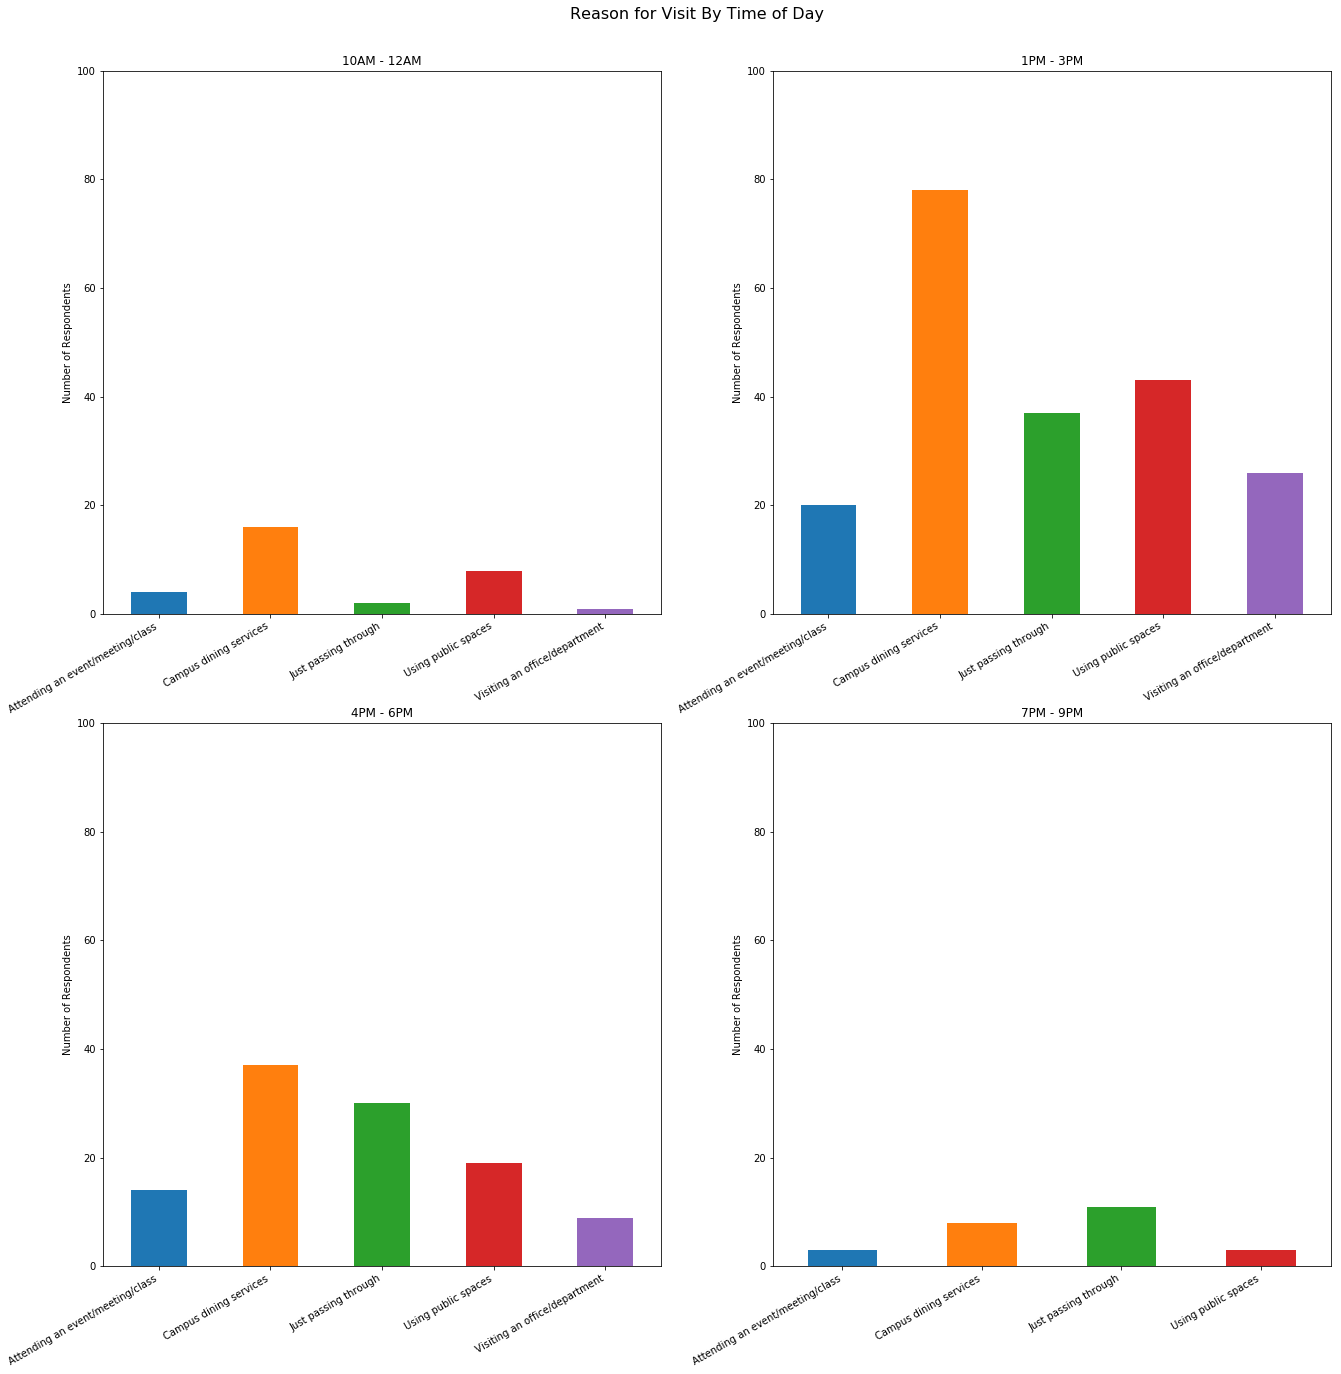

In [13]:
### BY TIME OF DAY
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(22,22))
fig.suptitle('Reason for Visit By Time of Day',y=.92, fontsize=16)
category = ["Undergraduate Student", "Graduate Student", "Faculty/Staff", "Guest to Campus"]
my_colors = "#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd"

def create_graph1(hour1,hour2,hour3,axes_label):
    graph = survey[(survey['HOUR'] == hour1) | (survey['HOUR'] == hour2) | (survey['HOUR'] == hour3)] 
    survey_graph = graph['Q1 WHAT BROUGHT YOU HERE?'].replace(to_replace = 
                                                              " \(studying, meeting, working\)",value = "", regex= True)
    survey_graph = survey_graph.str.rsplit("," ,expand=True)
    
    empty_list1 = []
    for i in range(len(survey_graph.columns)):
        survey_graph[i] = survey_graph[i].tolist()
        empty_list1.append(survey_graph[i])
    flat_list = [item for sublist in empty_list1 for item in sublist]
    list_series = pd.Series(flat_list)
    
    if hour1 > 9:
        hours = str(hour1) + "AM - " + str(hour3) + "AM"
    else:
        hours = str(hour1) + "PM - " + str(hour3) + "PM"
    
    graph = list_series.value_counts().sort_index().plot(ax=axes_label,kind='bar',title = hours )
    plt.setp(axes_label.get_xticklabels(), rotation=30, horizontalalignment='right')
    if axes_label == ax3 or axes_label == ax4:
        axes_label.set_ylim(0,100)
    else:
        axes_label.set_ylim(0,100)
    axes_label.set_ylabel("Number of Respondents")
      
create_graph1(10,11,12, ax1)
create_graph1(1,2,3, ax2)
create_graph1(4,5,6, ax3)
create_graph1(7,8,9, ax4)

plt.show()

The trend still follows true that most of our visitors come to the SAC for campus dining services. The second most are peple that are just passing through.

Between **1PM and 3PM**, there are more people using public spaces. This is most likely due to Campus Lifetime, where students are engaged in events and activities. 


### 3) How would you rate each of the following for the building during your visit today?

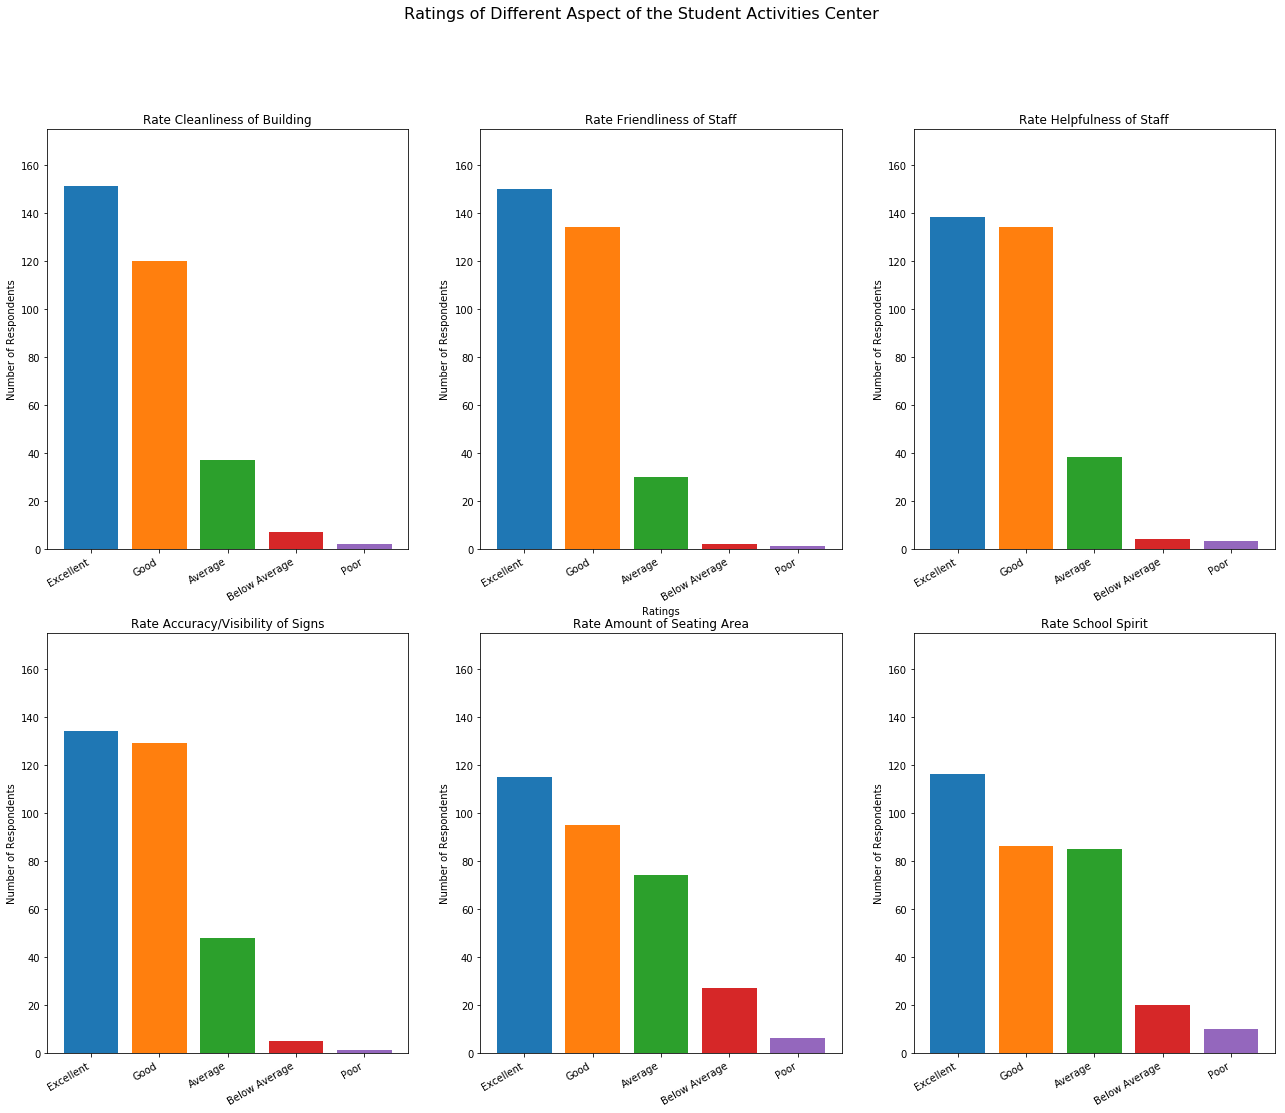

In [25]:
#Question 3 Graphs
unique_ratings = ['Excellent', 'Good', 'Average','Below Average','Poor']
my_colors = "#1f77b4","#ff7f0e","#2ca02c","#d62728","#9467bd"

fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(22,17))
fig.suptitle('Ratings of Different Aspect of the Student Activities Center', fontsize=16)

q4_questions = ['Q3_1 RATE CLEANLINESS OF BUILDING','Q3_2 RATE FRIENDLINESS OF STAFF','Q3_3 RATE HELPFULNESS OF STAFF',
               'Q3_4 RATE ACCURACY/VISIBILITY OF SIGNS','Q3_5 RATE AMOUNT OF SEATING AREA','Q3_6 RATE SCHOOL SPIRIT']


chart_title = ["Rate Cleanliness of Building","Rate Friendliness of Staff","Rate Helpfulness of Staff"
              ,"Rate Accuracy/Visibility of Signs","Rate Amount of Seating Area","Rate School Spirit"]

data_list = []
for question in q4_questions:
    data_list.append(survey[question].value_counts().tolist())
        
for count in data_list:
    while len(count) < 5:
        count.append(0)   
        
#Make axes and labels
axes_name = [ax1,ax2,ax3,ax4,ax5,ax6]

for axes in axes_name:
    axes.set_ylabel("Number of Respondents")
    axes.set_ylim(0,175)

ax2.set_xlabel("Ratings")
ax2.set_ylim(0,175)

#Make 6 bar graphs
for i,j in zip(axes_name,range(0,6)):
    i.bar(unique_ratings,data_list[j],color=my_colors)
    i.set_title(chart_title[j])

for count in axes_name:
    plt.setp(count.get_xticklabels(), rotation=30, horizontalalignment='right')

We ask our visitors to rate the different aspects of the Student Activities Center. Feedback is helpful in assessing the quality of serivces and amenities that are provided in the building.

The trend shows most of our visitors are satisfied with the cleanliness of the building, helpfulness of staff, friendliness of staff and visibility of signs. However, ratings for **amount of public seating** and **visibility of school spirit** is significantly lower.

Most of the public seating or study areas available is at the SAC Lobby. During crowded hours, when the SAC is packed, there would almost be no available seating. Additionally, our visitors say that visibility of school spirit is may be low at times.  


### 4) On average, how often do you visit the Student Activities Center?

Total number of responses: 317


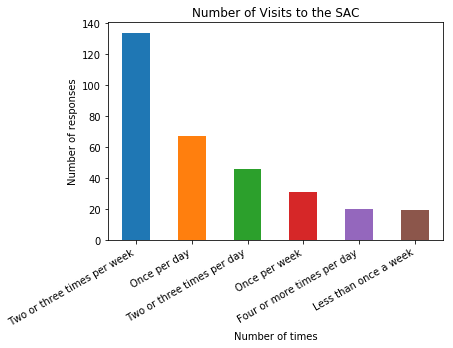

In [15]:
#How often do you visit the SAC?
fig, ax4 = plt.subplots()
survey['Q4 HOW OFTEN DO YOU VISIT SAC?'].value_counts().plot(ax=ax4,kind='bar',title = "Number of Visits to the SAC")
plt.ylabel("Number of responses")
plt.xlabel("Number of times")
plt.setp(ax4.get_xticklabels(), rotation=30, horizontalalignment='right')
print("Total number of responses:", survey['Q4 HOW OFTEN DO YOU VISIT SAC?'].count())

Let's see how often our visitors come to the SAC on a weekly basis. We want to determine the foot traffic of the building through the week. 
The most frequent number of visits are **two or three times a week**. One reason this may be the case is how the school scheduling system works. Schedules for certain classes rotate between Monday, Wednesday and Friday while other classes rotate between Tuesday and Thursday. Depending on where the classes are located, many students may go to the SAC to grab a bite or study there after their classes. 


### 5) On average, what is the most frequent to least frequent reason for your visit to the SAC?

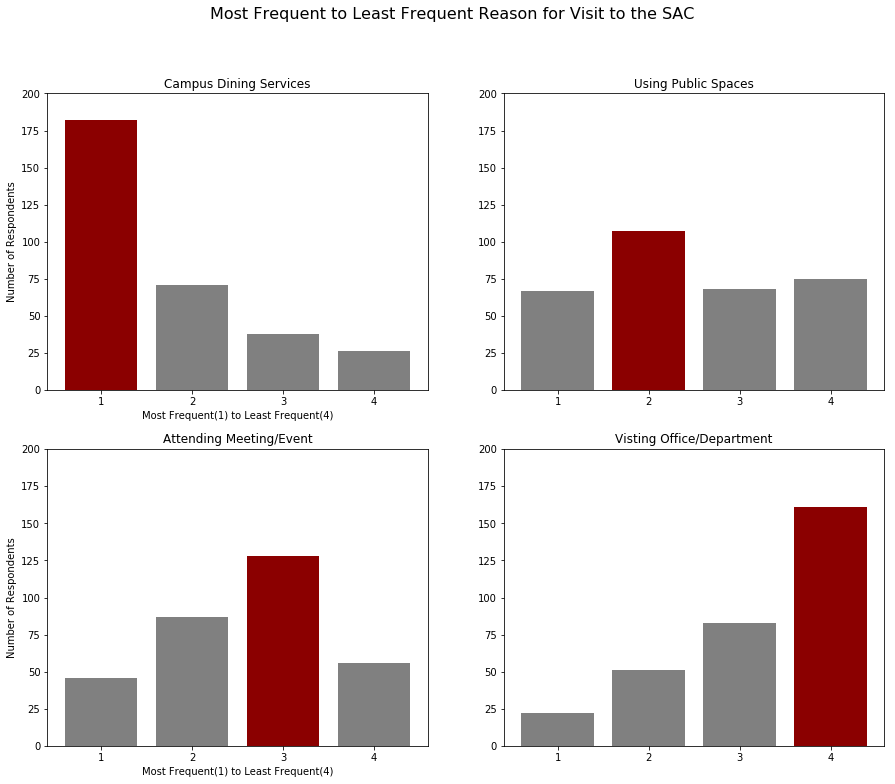

In [16]:
#5) What is your most frequent and least frequent visit?
rankings = ["1","2","3","4"]

fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(15,12))
fig.suptitle('Most Frequent to Least Frequent Reason for Visit to the SAC', fontsize=16)

question_5 = ["Q5_1 ORDER MOST(1) FREQUENT TO LEAST(4) - CAMPUS DINING",
              "Q5_4 ORDER MOST(1) FREQUENT TO LEAST(4) - USING PUBLIC SPACE",
              "Q5_2 ORDER MOST(1) FREQUENT TO LEAST(4) - ATTEND MEETING/EVENT"
              ,"Q5_3 ORDER MOST(1) FREQUENT TO LEAST(4) - VISIT OFFICE/DEPARTMENT"]

q5_title = ["Campus Dining Services","Using Public Spaces","Attending Meeting/Event","Visting Office/Department"]
axes_name = [ax1,ax2,ax3,ax4]
ax1.set_ylabel("Number of Respondents")
ax3.set_ylabel("Number of Respondents")
ax1.set_xlabel("Most Frequent(1) to Least Frequent(4)")
ax3.set_xlabel("Most Frequent(1) to Least Frequent(4)")

data_list = []
for question in question_5:
    data_list.append(survey[question].value_counts().sort_index().tolist())
   
for i,j in zip(axes_name,range(0,4)):
    i.set_ylim(0,200)
    #make highest bar a color by itself
    colors = ['grey' if (x < max(data_list[j])) else 'darkred' for x in data_list[j] ] 
    i.bar(rankings,data_list[j],color=colors)
    i.set_title(q5_title[j])
    

Total number of responses: 368


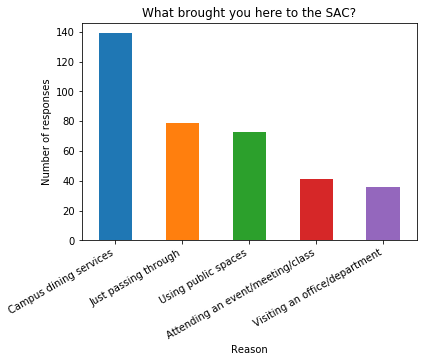

In [17]:
fig, ax2 = plt.subplots()
q2_bar = full_column.value_counts().plot(ax=ax2,kind='bar',title = "What brought you here to the SAC?")
plt.ylabel("Number of responses")
plt.xlabel("Reason")
plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')
print("Total number of responses:", full_column.count())


We asked our visitors to rate the reason for their most frequent visit. The red bar in each graph is what most people chose as their ranking. Most people chose **"Campus Dining Services"** as their most frequent reasont to visit (1). These graphs show an interesting parallel when compared to the data in Question 1 "What was the reason for your visit today?", as shown above.

The graphs shows the following rankings of most frequent reason visit to least frequent reason for visit:
1. Campus dining services (1)
2. Using public spaces (2)
3. Attending an event/meeting (3)
4. Visiting an office/department (4)

### 6) Do the TV in the building (SCALA displays) show interesting, relevant information to you?

Total number of responses: 317
I haven't looked at/seen TV monitors in the SAC    128
Yes                                                116
No                                                 73 
Name: Q6 DO TV SHOW RELEVANT INFO?, dtype: int64


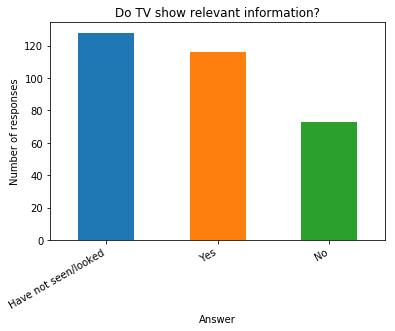

In [18]:
#Do the TV in building show relevant info?
fig, ax = plt.subplots()
survey['Q6 DO TV SHOW RELEVANT INFO?'].value_counts().plot(ax=ax,kind='bar',title = "Do TV show relevant information?")
plt.ylabel("Number of responses")
plt.xlabel("Answer")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_xticklabels(["Have not seen/looked","Yes","No"])
print("Total number of responses:", survey['Q6 DO TV SHOW RELEVANT INFO?'].count())
print(survey['Q6 DO TV SHOW RELEVANT INFO?'].value_counts())

Most people have not seen or looked at the SCALA displays in the Student Activities Center. Many of the respondents did not even know where it was located. This is a combined total of **over 60%** of responses saying **"No"** or **"Have not seen/looked** at SCALA TVs. 

*Note: There is only one set of SCALA displays, which are only located in the main lobby. The surveys are sometimes given out at locations where the SCALA displays are not in sight.*

### 7)  Were your accessibility needs met by the Student Activities Center?

Total number of responses: 317
Yes                                 181
I have no accessibility concerns    110
No                                  26 
Name: Q7 WERE ACCESSIBILITY NEEDS MET BY SAC?, dtype: int64


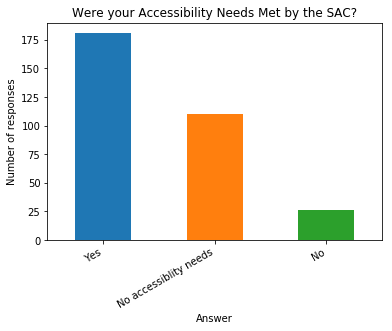

In [19]:
fig, ax = plt.subplots()
survey['Q7 WERE ACCESSIBILITY NEEDS MET BY SAC?'].value_counts().plot(ax=ax,kind='bar',title = "Were your Accessibility Needs Met by the SAC?")
plt.ylabel("Number of responses")
plt.xlabel("Answer")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_xticklabels(["Yes","No accessiblity needs","No"])
print("Total number of responses:", survey['Q7 WERE ACCESSIBILITY NEEDS MET BY SAC?'].count())
print(survey['Q7 WERE ACCESSIBILITY NEEDS MET BY SAC?'].value_counts())

A majority of the people had their accessibility needs met by the SAC while another good portion did not have any needs.
However, there are many people who did not have their accessbility needs met. As a building, we want to accomodate to everyone's needs and want to make sure our guests are satisfied with their experience here. 

It is important that we address to the accessbility needs to these people.

## 8) What services and/or amenities does the Student Activities Center currently provide that you find most helpful?

In [20]:
survey['Q8 WHAT SERVICES/AMENITIES DO WE HAVE?'].dropna().count
q8_answer_list = []
for answer in survey['Q8 WHAT SERVICES/AMENITIES DO WE HAVE?'].dropna():
    q8_answer_list.append(answer)
q8_list= []
for answer in q8_answer_list:
    sentence = answer.split(' ')
    for word in sentence:
        #remove non characters and lowercase all words
        word = re.sub(r'[^a-zA-Z]', "", word)
        word = word.lower()
        if word.endswith("s"):
            q8_list.append(word[:-1])
        else:
            q8_list.append(word)
                  
q8_answer = pd.Series(answer for answer in q8_list)

#remove unnecessary words
remove_word_list = ['',"and", "with", "the", "to", "a","also","i","of","it","in","for","that","there"]  
for remove in remove_word_list:
    q8_answer = q8_answer[q8_answer != remove]

q8_keys = q8_answer.value_counts().keys().tolist()
q8_counts = q8_answer.value_counts().tolist()
q8_keys = q8_keys[:25]
q8_counts = q8_counts[:25]

#Create categories
study_table = ["table","study", "space","area"]
power_outlet = ["power","outlet"]
dining_food = ["dining","food","good"]
all_gender_restroom = ["all","gender","bathroom","restroom"]
commuter_lounge = ["commuter","lounge"]
bank = ["atm","bank"]
q8_categories = study_table, power_outlet, dining_food, all_gender_restroom, commuter_lounge, bank

q8_data = {'q8_keys':q8_keys, 'q8_counts':q8_counts}
q8_df = pd.DataFrame(data=q8_data)
#print(q8_df)

largest_number = []
for category in q8_categories:
    biggest = []
    for key in category:
        biggest.append(q8_df[q8_df['q8_keys']==key]['q8_counts'].iloc[0])
    largest_number.append(max(biggest))

q8_ticks = ["Public Spaces","Power Outlets","Food Services","All Gender Restroom", 
            "Commuter Lounge", "Bank"]
q8_tidy = pd.DataFrame({"Services Available":q8_categories, "Number":largest_number})

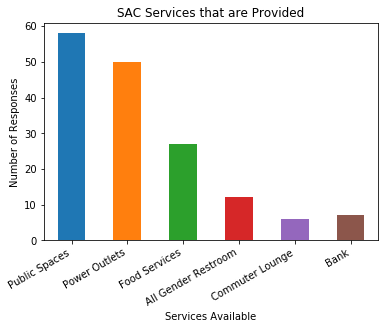

In [21]:
fig, ax = plt.subplots()
q8_tidy.plot(x = "Services Available", y = "Number",kind = "bar",ax=ax,
             title= "SAC Services that are Provided",legend = False)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylabel("Number of Responses")
ax.set_xticklabels(q8_ticks)
print("")

Respondents were given the option to state the services or amenities that the SAC provided.

Our visitors enjoyed the public seating and power outlets that are available. The SAC also provides a variety of foods to choose from and more recently, all-gender restrooms. 

The commuter lounge provides a great area for commuters to relax and rest up before their next class. The SAC also provides an ATM where people can quickly transfer money. 

*Note: I want to address some bias within this question. The survey provided examples of services and amenities the SAC provides. Many of the responses include those examples.*

## 9) What services and/or amenities does the Student Activities Center currently lack that you would like to see added?

In [22]:
survey['Q9 WHAT SERVICES/AMENITIES DO WE LACK?'].dropna().count
#print(survey['Q9 WHAT SERVICES/AMENITIES DO WE LACK?'].dropna().shape)
q9_answer_list = []
for answer in survey['Q9 WHAT SERVICES/AMENITIES DO WE LACK?'].dropna():
    q9_answer_list.append(answer)

#answer_list
q9_list=[]
for answer in q9_answer_list:
    sentence = answer.split(' ')
    for word in sentence:
        word = re.sub(r'[^a-zA-Z]', "", word)
        word = word.lower()
        if word.endswith("s"):
            q9_list.append(word[:-1])
        else:
            q9_list.append(word)
        
q9_answer = pd.Series(answer for answer in q9_list)

remove_word_list = ['',"and", "with", "the", "to", "a","also","i","of","it","in","for","that","there","none","nothing","sac"
                   ,"or","not","event"]  
for remove in remove_word_list:
    q9_answer = q9_answer[q9_answer != remove]

q9_keys = q9_answer.value_counts().keys().tolist()
q9_counts = q9_answer.value_counts().tolist()
q9_answer.value_counts()
q9_keys = q9_keys[1:14]
q9_counts = q9_counts[1:14]
#print(q9_keys)

#Create categories
study_table = ["table","study","area"]
public_space = ["space","seating","seat","space"]
outlet = ["outlet"]
food_services = ["better","food"]
#printer = ["printer"]
dunkin = ["dunkin","donut"]
bathroom = ["bathroom"]
#pool = ["pool"]

q9_categories = study_table, outlet,food_services,public_space, dunkin, bathroom

q9_data = {'q9_keys':q9_keys, 'q9_counts':q9_counts}
q9_df = pd.DataFrame(data=q9_data)
#print(q9_df)

largest_number = []
for category in q9_categories:
    biggest = []
    for key in category:
        biggest.append(q9_df[q9_df['q9_keys']==key]['q9_counts'].iloc[0])
    largest_number.append(max(biggest))
#print(largest_number)

q9_tidy = pd.DataFrame({"Services Lacking":q9_categories, "Number":largest_number})
q9_ticks = ["Study Table","Power Outlets","Food Services","Public Spaces","Dunkin Donuts", "Bathroom"]

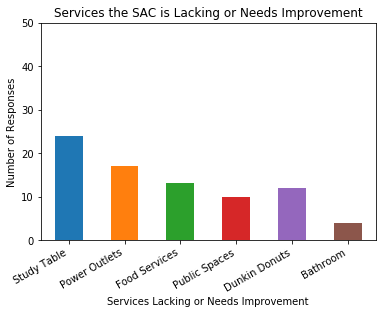

In [23]:
fig, ax = plt.subplots()
q9_tidy.plot(x = "Services Lacking", y = "Number",kind = "bar",ax=ax,
             title= "Services the SAC is Lacking or Needs Improvement",legend = False)
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
ax.set_ylabel("Number of Responses")
ax.set_xlabel("Services Lacking or Needs Improvement")
ax.set_xticklabels(q9_ticks)
ax.set_ylim(0,50)
print("")

Though many of these services are available at the SAC, many people thought that the amount of study tables/public seating was inadequate. 

Although there are food services in the SAC as well, many people thought that the food provided could be improved. There is a wide variety of choices to choose from, but the food does not taste great all the time. They may not be fresh or the portions are too small. 

There is a lot of people that would like to see the Dunkin' Donuts to be opened soon. It is currently under construction.

Others believed that the bathrooms could be cleaner.

## May we contact you again?

Total number of responses: 317
No     264
Yes    53 
Name: Q10 MAY WE CONTACT YOU AGAIN?, dtype: int64


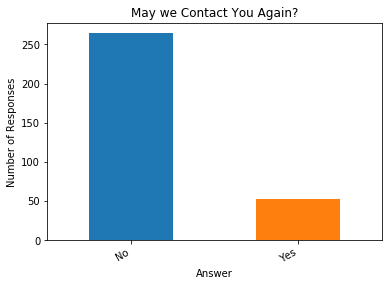

In [24]:
#May we contact you again?
fig, ax = plt.subplots()
survey['Q10 MAY WE CONTACT YOU AGAIN?'].value_counts().plot(ax=ax,kind='bar',title = "May we Contact You Again?")
plt.ylabel("Number of Responses")
plt.xlabel("Answer")
plt.setp(ax.get_xticklabels(), rotation=30, horizontalalignment='right')
print("Total number of responses:", survey['Q2_1 WHICH OF THE FOLLOWING DESCRIBES YOU?'].count())
print(survey['Q10 MAY WE CONTACT YOU AGAIN?'].value_counts())

At the end of the survey, we give our surveyees a choice to opt in for our email list. We have **over 15%** of people opting in and saying yes to being contacted again. We can ask some of these people to be part of a study group for further surveying.

<a id='conclusion'></a>
## Conclusion

The Student Activities Center is the biggest student hub on Stony Brook Campus. It provides many services and amenities to the guests that come visit. While administering this survey, we were able to find useful information and feedback on our services and how we can improve them for the future. Here are a few takeaways:

- Over 85% of the respondents are undergraduate students.
- The most frequent reason to least frequent reason to visit is
        1) Campus Dining Services
        2) Using Public Spaces
        3) Attending Event/Meeting/Class
        4) Visting Office/Department
- Over 60% of the respondents say that the SCALA TV did not show relevant information or did not see the TVs at all.
- Our visitors would want to see improved food quality, more printers and more study spaces.
- Dunkin' Donuts        

<a id='movingforward'></a>
## Moving Forward

This project has been a semester long journey for me. After conducting data analysis and writing this report, I want to give my thoughts on the results of this project and what I've learned.

One of our concerns to improve the services at the Student Activities Center is to provide additional public spaces and study tables. While that is not possible right now due to limited space, we can use this information for the near future. The Union, the new student center currently under construction, can use this data to make informed decisions on the services and amenities the building will provide in the future. 
Many offices in the SAC will be transferred to the Union once it is completed. This will open up free space on the upper floors. The SAC can use this space to upen up new meeting rooms, lounges and recreational rooms for everyone to use. 

Another concern we have is improving the quality and increasing variety of food that is offered at the SAC dining. There are many people that visit the SAC solely for dining services. Some of these people believe that the quality of food should be improved. The taste of food does not accurately reflect its price. Variety of food and portion size can also be increased. Often times, the food there would not be fresh and not taste good. 
We can forward these survey and analysis results to campus dining services and they can make further adjustments. 

This report will be useful for future short term and long term plans for the Student Activities Center and similar buildings for Stony Brook University. I hope the university can make informed decisions on future plans to improve services and amenities for everyone that visits the campus. Thank you for reading this report and hope you had fun reading it. 

*Special thanks to the Student Activities Center, the SAC Reservations office and Michael Boerner, my intern supervisor.*